# 0. Code Library and Links

In [4]:
import numpy as np 
import pandas as pd 
import scipy
import seaborn
import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn import datasets, preprocessing
from sklearn import linear_model, svm

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [10]:
from sklearn.kernel_ridge import KernelRidge

In [193]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [11]:
from sklearn.neural_network import MLPClassifier, BernoulliRBM

In [12]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

In [275]:
regressor_list = []
regressor_names = []
reg_datasets = []

r2_train, r2_test = [], []
ev_train, ev_test = [], []

mse_train, mse_test = [], []
mae_train, mae_test = [], []

mdae_train, mdae_test = [], []

In [276]:
def regressor_fit_score(regressor, regressor_name, dataset, x_train, x_test, y_train, y_test):
    regressor_list.append(str(regressor))
    regressor_names.append(str(regressor_name))
    reg_datasets.append(str(dataset))
    
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_reg_train = reg.predict(x_train)
    y_reg_test = reg.predict(x_test)
    
    r2_reg_train = round(r2_score(y_train, y_reg_train), 4)
    r2_train.append(r2_reg_train)
    r2_reg_test = round(r2_score(y_test, y_reg_test), 4)
    r2_test.append(r2_reg_test)
    
    ev_reg_train = round(explained_variance_score(y_train, y_reg_train), 4)
    ev_train.append(ev_reg_train)
    ev_reg_test = round(explained_variance_score(y_test, y_reg_test), 4)
    ev_test.append(ev_reg_test)
    
    mse_reg_train = round(mean_squared_error(y_train, y_reg_train), 4)
    mse_train.append(mse_reg_train)
    mse_reg_test = round(mean_squared_error(y_test, y_reg_test), 4)
    mse_test.append(mse_reg_test)
    
    mae_reg_train = round(mean_absolute_error(y_train, y_reg_train), 4)
    mae_train.append(mae_reg_train)
    mae_reg_test = round(mean_absolute_error(y_test, y_reg_test), 4)
    mae_test.append(mae_reg_test)
    
    mdae_reg_train = round(median_absolute_error(y_train, y_reg_train), 4)
    mdae_train.append(mdae_reg_train)
    mdae_reg_test = round(median_absolute_error(y_test, y_reg_test), 4)
    mdae_test.append(mdae_reg_test)
    
    return [y_reg_train, y_reg_test, mdae_reg_train, mdae_reg_test,
            r2_reg_train, r2_reg_test, ev_reg_train, ev_reg_test,
            mse_reg_train, mse_reg_test, mae_reg_train, mae_reg_test]

In [277]:
def get_regressor_results():
    df_results = pd.DataFrame({'regressor' : regressor_list,
                               'regressor_name': regressor_names,
                               'dataset': reg_datasets,
                               'r2_train': r2_train, 'r2_test': r2_test,
                               'ev_train': ev_train, 'ev_test': ev_test,
                               'mse_train': mse_train, 'mse_test': mse_test,
                               'mae_train': mae_train, 'mae_test': mae_test,
                               'mdae_train': mdae_train, 'mdae_test': mdae_test})
    
    df_list = ['regressor_name', 'r2_train', 'r2_test', 'ev_train', 'ev_test',
               'mse_train', 'mse_test', 'mae_train', 'mae_test', 'mdae_train', 'mdae_test']
               
    return df_results, df_results[df_list]

In [329]:
classifier_list = []
classifier_names = []
clf_datasets = []

acc_train, acc_test = [], []
loss_train, loss_test = [], []

In [330]:
def classifier_fit_score(classifier, classifier_name, clf_dataset, x_train, x_test, y_train, y_test):
    classifier_list.append(str(classifier))
    classifier_names.append(str(classifier_name))
    clf_datasets.append(str(clf_dataset))
    
    clf = classifier
    clf.fit(x_train, y_train)
    
    y_clf_train = clf.predict(x_train)
    y_clf_test = clf.predict(x_test)
        
    acc_clf_train = round(accuracy_score(y_train, y_clf_train), 4)
    acc_train.append(acc_clf_train)
    acc_clf_test = round(accuracy_score(y_test, y_clf_test), 4)
    acc_test.append(acc_clf_test)
    
    loss_clf_train = round(hamming_loss(y_train, y_clf_train), 4)
    loss_train.append(loss_clf_train)
    loss_clf_test = round(hamming_loss(y_test, y_clf_test), 4)
    loss_test.append(loss_clf_test)
    
    return [y_clf_train, y_clf_test, acc_clf_train, acc_clf_test, loss_clf_train, loss_clf_test]

In [331]:
def get_classifier_results():
    df_results = pd.DataFrame({'classifier' : classifier_list,
                               'classifier_name': classifier_names,
                               'clf_dataset': clf_datasets,
                               'acc_train': acc_train, 'acc_test': acc_test,
                               'loss_train': loss_train, 'loss_test': loss_test})
    
    df_list = ['classifier_name', 'acc_train', 'acc_test', 'loss_train', 'loss_test']
               
    return df_results, df_results[df_list]

In [332]:
%precision %.4g
0.1234567

0.1235

---
# 1. Data Samples

In [282]:
# external
boston = datasets.load_boston()
housing = datasets.fetch_california_housing()
digits = datasets.load_digits()

In [21]:
X1, y1 = boston.data, boston.target
X2, y2 = housing.data, housing.target
X3, y3 = digits.data, digits.target

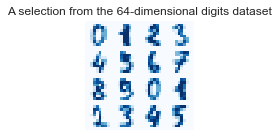

In [22]:
# Digit Data
n_img_per_row = 4
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X3[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.Blues)

plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset');

In [23]:
# artificial
# 5000x3 - matrix, 2 - (responsible for targets) features, 1 - the target, 0.97 - the bias factor)
regression_data = datasets.make_regression(5000, 3, 2, 1, 0.97)
X4, y4 = regression_data[0], regression_data[1]

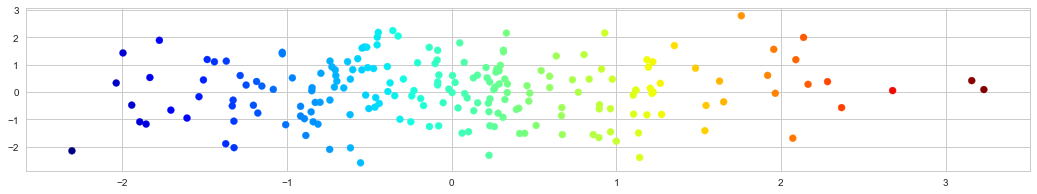

In [24]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,3))
plt.scatter(X4[:200, 0], X4[:200, 1], c=y4[:200], cmap=cm.jet);

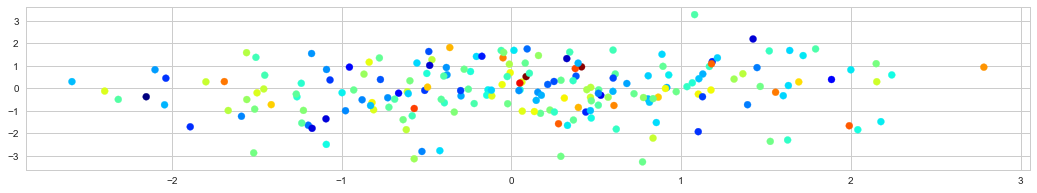

In [25]:
plt.figure(figsize=(18,3))
plt.scatter(X4[:200, 1], X4[:200, 2], c=y4[:200], cmap=cm.jet);

In [26]:
# 5000x10 - matrix, 8 - (responsible for targets) features, 2 - targets, 0.7 - the bias factor, 10.0 - the noise)
regression_data2 = datasets.make_regression(5000, 10, 8, 2, 0.7, noise=10.0)
X7, y7 = regression_data2[0], regression_data2[1]

In [27]:
blobs_data = datasets.make_blobs(n_samples=1000, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.5)
X5, y5 = blobs_data[0], blobs_data[1]

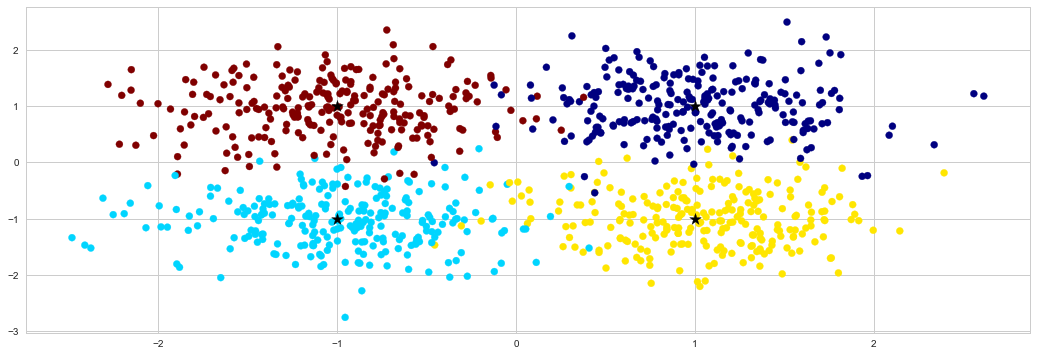

In [28]:
plt.figure(figsize=(18,6))
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=cm.jet)
plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [29]:
classification_data = datasets.make_multilabel_classification(n_classes=3, n_samples=1000, n_features=2)
X6, y6 = classification_data[0], classification_data[1]

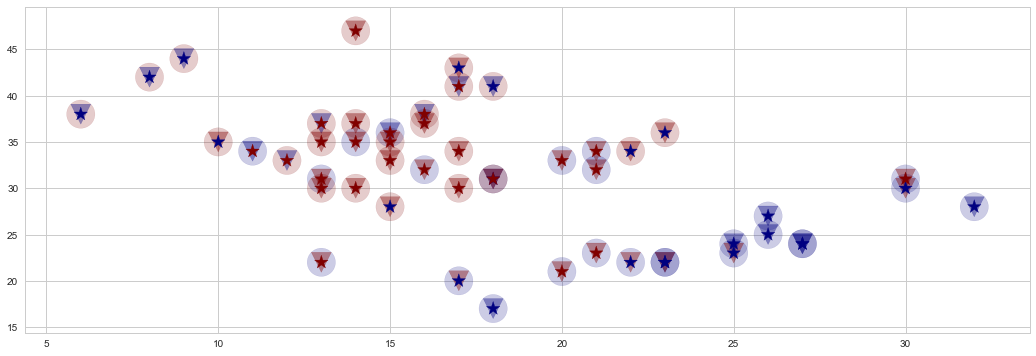

In [30]:
plt.figure(figsize=(18,6))
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 0], marker='o', alpha=0.2, cmap=cm.jet, s=800)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 1], marker='v', alpha=0.4, cmap=cm.jet, s=400)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 2], marker='*', cmap=cm.jet, s=200);

---
# 2. Extraction and Preprocessing

### *Extraction*

In [14]:
temperature = [{'city': 'Hanoi', 'temperature': 33.}, {'city': 'Frankfurt', 'temperature': 16.},
               {'city': 'Houston', 'temperature': 28.}, {'city': 'Riyadh', 'temperature': 38.},
               {'city': 'Barcelona', 'temperature': 17.}, {'city': 'Ankara', 'temperature': 27.}]

corpus = ['Have you already set your goals for the New Year?', 
          'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
          'Some experts believe that you need systems, not goals.', 
          'A system is something you do on a regular basis. ',
          'This means focusing on what you can control (your actions) rather than what you can’t.',
          'For example, do not focus on losing ten kilos.',
          'Focus on shopping for healthy food and cooking something light every day.',
          'Do not focus on the marathon.',
          'Focus on the training schedule.',
          'Invent a system to improve your English, one step at a time.',
          'Good luck!']

In [18]:
# Extraction from dicts
d_vectorizer = DictVectorizer()
d_vectorizer.fit_transform(temperature).toarray()

array([[  0.,   0.,   0.,   1.,   0.,   0.,  33.],
       [  0.,   0.,   1.,   0.,   0.,   0.,  16.],
       [  0.,   0.,   0.,   0.,   1.,   0.,  28.],
       [  0.,   0.,   0.,   0.,   0.,   1.,  38.],
       [  0.,   1.,   0.,   0.,   0.,   0.,  17.],
       [  1.,   0.,   0.,   0.,   0.,   0.,  27.]])

In [21]:
print(d_vectorizer.get_feature_names())

['city=Ankara', 'city=Barcelona', 'city=Frankfurt', 'city=Hanoi', 'city=Houston', 'city=Riyadh', 'temperature']


In [16]:
# Extraction from texts
c_vectorizer = CountVectorizer(min_df=1)
X_corpus = c_vectorizer.fit_transform(corpus)
X_corpus

<11x65 sparse matrix of type '<class 'numpy.int64'>'
	with 96 stored elements in Compressed Sparse Row format>

In [23]:
print(c_vectorizer.get_feature_names())

['actions', 'already', 'and', 'at', 'basis', 'believe', 'can', 'control', 'cooking', 'day', 'do', 'english', 'every', 'example', 'experts', 'fluent', 'focus', 'focusing', 'food', 'for', 'goals', 'good', 'have', 'healthy', 'improve', 'invent', 'is', 'kilos', 'light', 'lose', 'losing', 'luck', 'marathon', 'means', 'need', 'new', 'not', 'on', 'one', 'or', 'rather', 'regular', 'run', 'schedule', 'set', 'shopping', 'some', 'something', 'speak', 'step', 'system', 'systems', 'ten', 'than', 'that', 'the', 'this', 'time', 'to', 'training', 'want', 'what', 'year', 'you', 'your']


In [28]:
c_analyzer = c_vectorizer.build_analyzer()
c_analyzer(corpus[7])

['do', 'not', 'focus', 'on', 'the', 'marathon']

In [27]:
X_corpus.toarray()[7] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### *Scaling*

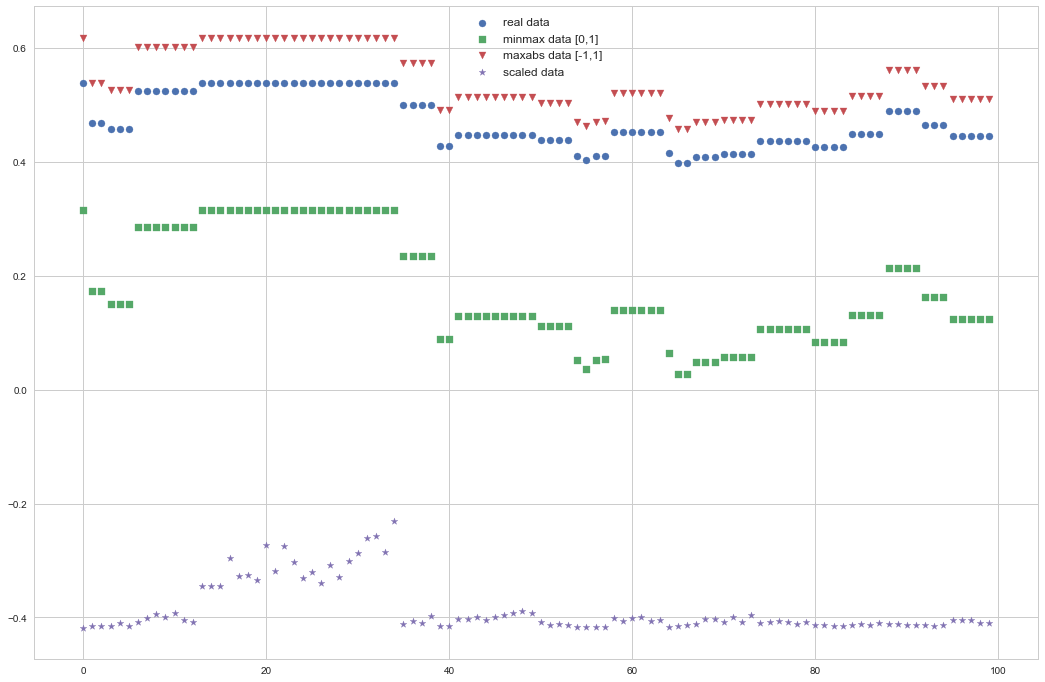

In [63]:
# Scaling features to a range
X1_scaled = preprocessing.scale(X1)
X1_minmax = preprocessing.MinMaxScaler().fit_transform(X1)
X1_maxabs = preprocessing.MaxAbsScaler().fit_transform(X1)

plt.figure(figsize=(18,12))
plt.scatter(range(100), X1[:100, 4], marker='o', label='real data')
plt.scatter(range(100), X1_minmax[:100, 4], marker='s', label='minmax data [0,1]')
plt.scatter(range(100), X1_maxabs[:100, 4], marker='v', label='maxabs data [-1,1]')
plt.scatter(range(100), X1_scaled[:100, 0], marker='*', label='scaled data')

plt.legend(fontsize=12);

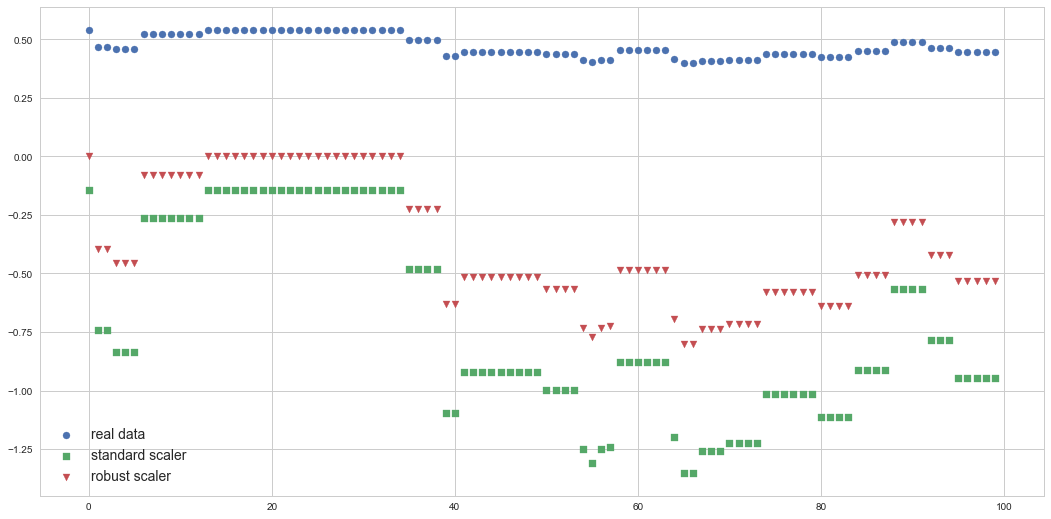

In [71]:
# StandardScaler, RobustScaler (data with outliers)
X1_stscaled = preprocessing.StandardScaler().fit_transform(X1)
X1_rbscaled = preprocessing.RobustScaler().fit_transform(X1)

plt.figure(figsize=(18,9))
plt.scatter(range(100), X1[:100, 4], marker='o', label='real data')
plt.scatter(range(100), X1_stscaled[:100, 4], marker='s', label='standard scaler')
plt.scatter(range(100), X1_rbscaled[:100, 4], marker='v', label='robust scaler')

plt.legend(fontsize=14);

### *Encoding, Imputation of Missing Values, Transforming*

In [88]:
# Encoding categorical features
print(y3[:3])
encoder = preprocessing.OneHotEncoder()
encoder.fit(y3.reshape(y3.shape[0], 1))
y3_cat = encoder.transform(y3.reshape(y3.shape[0], 1)).toarray()
print(y3_cat[:3])

[0 1 2]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


In [134]:
# Imputation of missing values
x1_train = [[0, 17], [np.nan, 4], [1, 7], [3, np.nan], [10, 25]]
x1_test = [[np.nan, 5], [8, np.nan], [4, 6]]

# mean
mean_imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer.fit(x1_train)
mean_imputer.transform(x1_test)

array([[  3.5 ,   5.  ],
       [  8.  ,  13.25],
       [  4.  ,   6.  ]])

In [135]:
# median
median_imputer = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
median_imputer.fit(x1_train)
median_imputer.transform(x1_test)

array([[  2.,   5.],
       [  8.,  12.],
       [  4.,   6.]])

In [136]:
# Custom transformers
log_transformer = preprocessing.FunctionTransformer(np.log1p)
x1_log = log_transformer.transform(median_imputer.transform(x1_test))
x1_log

array([[ 1.09861229,  1.79175947],
       [ 2.19722458,  2.56494936],
       [ 1.60943791,  1.94591015]])

### *Dimensionality Reduction*

In [ ]:
# Principal component analysis


In [ ]:
# Random projections


In [ ]:
# Feature agglomeration


### *Shuffling and Splitting*

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X_train1.shape, X_test1.shape

((404, 13), (102, 13))

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X_train2.shape, X_test2.shape

((16512, 8), (4128, 8))

In [33]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 1)
X_train3.shape, X_test3.shape

((1437, 64), (360, 64))

In [34]:
y_train3.shape, y_test3.shape

((1437,), (360,))

In [35]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 1)
X_train4.shape, X_test4.shape

((4000, 3), (1000, 3))

In [36]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2, random_state = 1)
X_train5.shape, X_test5.shape

((800, 2), (200, 2))

In [37]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.2, random_state = 1)
X_train6.shape, X_test6.shape

((800, 2), (200, 2))

In [38]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.2, random_state = 1)
X_train7.shape, X_test7.shape

((4000, 10), (1000, 10))

---
# 3. Supervised learning

## 3.1 Regression

### *Generalized Linear Models; Boston Dataset*

In [283]:
reg1 = linear_model.LinearRegression()
reg2 = linear_model.Ridge()
reg3 = linear_model.RidgeCV()
reg4 = linear_model.Lasso()
reg5 = linear_model.LassoLarsCV()

In [284]:
y_lr_train11, y_lr_test11 = regressor_fit_score(reg1, 'LinearRegression', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_rr_train12, y_rr_test12 = regressor_fit_score(reg2, 'Ridge', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_rcvr_train13, y_rcvr_test13 = regressor_fit_score(reg3, 'RidgeCV', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_lsr_train14, y_lsr_test14 = regressor_fit_score(reg4, 'Lasso', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_llcvr_train15, y_llcvr_test15 = regressor_fit_score(reg5, 'LassoLarsCV', 'boston',
                                                      X_train1, X_test1, y_train1, y_test1)[:2]

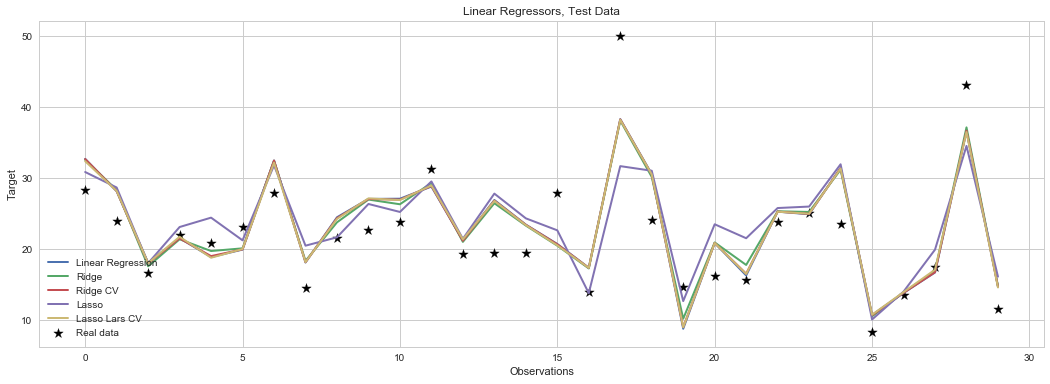

In [285]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_lr_test11[:n], lw=2, label='Linear Regression')
plt.plot(x, y_rr_test12[:n], lw=2, label='Ridge')
plt.plot(x, y_rcvr_test13[:n], lw=2, label='Ridge CV')
plt.plot(x, y_lsr_test14[:n], lw=2, label='Lasso')
plt.plot(x, y_llcvr_test15[:n], lw=2, label='Lasso Lars CV')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

In [286]:
reg6 = linear_model.RANSACRegressor()
reg7 = linear_model.BayesianRidge()
reg8 = linear_model.ARDRegression()
reg9 = linear_model.HuberRegressor()
reg10 = linear_model.TheilSenRegressor()

In [287]:
y_ranr_train16, y_ranr_test16 = regressor_fit_score(reg6, 'RANSACRegressor', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_br_train17, y_br_test17 = regressor_fit_score(reg7, 'BayesianRidge', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_ardr_train18, y_ardr_test18 = regressor_fit_score(reg8, 'ARDRegression', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_hr_train19, y_hr_test19 = regressor_fit_score(reg9, 'HuberRegressor', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_tsr_train110, y_tsr_test110 = regressor_fit_score(reg10, 'TheilSenRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

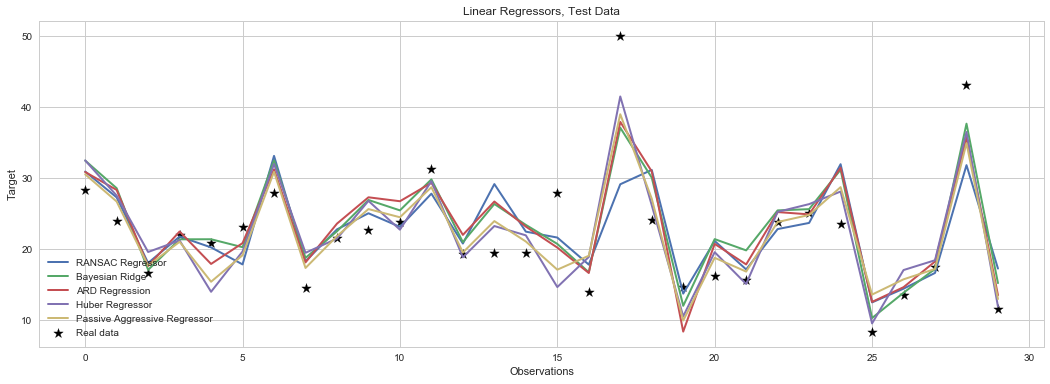

In [288]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_ranr_test16[:n], lw=2, label='RANSAC Regressor')
plt.plot(x, y_br_test17[:n], lw=2, label='Bayesian Ridge')
plt.plot(x, y_ardr_test18[:n], lw=2, label='ARD Regression')
plt.plot(x, y_hr_test19[:n], lw=2, label='Huber Regressor')
plt.plot(x, y_tsr_test110[:n], lw=2, label='Passive Aggressive Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

### *Generalized Linear Models; Toy Regression Dataset*

In [289]:
reg11 = linear_model.PassiveAggressiveRegressor()
reg12 = linear_model.ElasticNet()
reg13 = linear_model.SGDRegressor()

In [290]:
y_par_train411, y_par_test411 = regressor_fit_score(reg11, 'PassiveAggressiveRegressor', 'toy regression',
                                                   X_train4, X_test4, y_train4, y_test4)[:2]

y_enr_train412, y_enr_test412 = regressor_fit_score(reg12, 'ElasticNet', 'toy regression',
                                                X_train4, X_test4, y_train4, y_test4)[:2]

y_sgdr_train413, y_sgdr_test413 = regressor_fit_score(reg13, 'SGDRegressor', 'toy regression',
                                                      X_train4, X_test4, y_train4, y_test4)[:2]


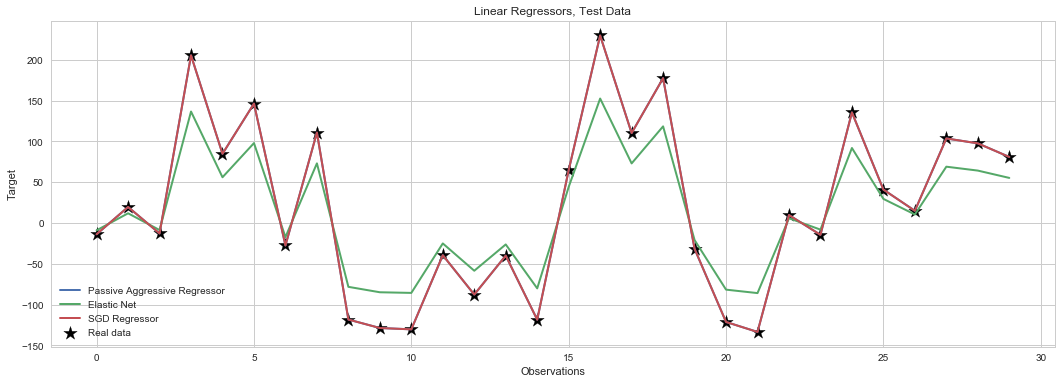

In [291]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_par_test411[:n], lw=2, label='Passive Aggressive Regressor')
plt.plot(x, y_enr_test412[:n], lw=2, label='Elastic Net')
plt.plot(x, y_sgdr_test413[:n], lw=2, label='SGD Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

### *Combining Regression with Kernels; Toy Regression Dataset 2*

In [292]:
reg14 = KernelRidge()
reg14.fit(X_train7, y_train7)
    
y_kr_train714 = reg14.predict(X_train7)
y_kr_test714 = reg14.predict(X_test7)

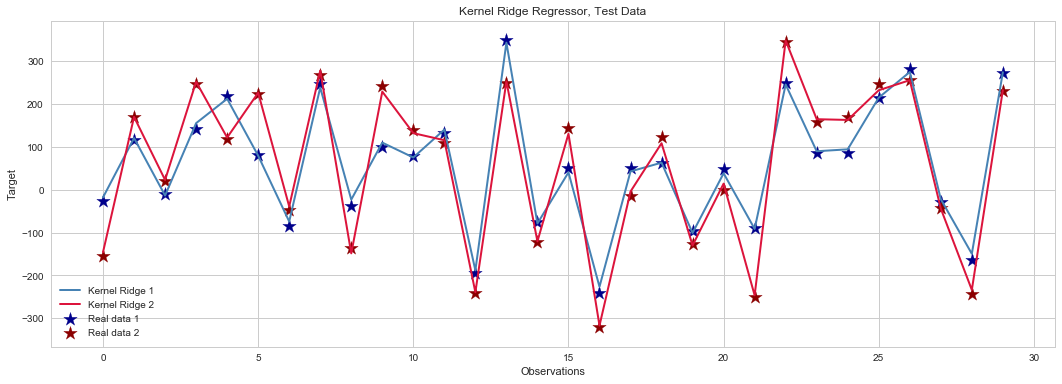

In [293]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test7[:n, 0], marker='*', s=200, color='darkblue', label='Real data 1')
plt.scatter(x, y_test7[:n, 1], marker='*', s=200, color='darkred', label='Real data 2')

plt.plot(x, y_kr_test714[:n, 0], lw=2, color='steelblue', label='Kernel Ridge 1')
plt.plot(x, y_kr_test714[:n, 1], lw=2, color='crimson', label='Kernel Ridge 2')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Kernel Ridge Regressor, Test Data')
plt.legend(loc=3);

In [294]:
reg14.score(X_test7, y_test7)

0.9956

### *Support Vector Machines, Nearest Neighbors*

In [295]:
reg15 = svm.SVR()
reg16 = KNeighborsRegressor()
reg17 = RadiusNeighborsRegressor(radius=1.05)

In [296]:
y_svr_train415, y_svr_test415 = regressor_fit_score(reg15, 'SVR', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

y_knr_train416, y_knr_test416 = regressor_fit_score(reg16, 'KNeighborsRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

y_rnr_train417, y_rnr_test417 = regressor_fit_score(reg17, 'RadiusNeighborsRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

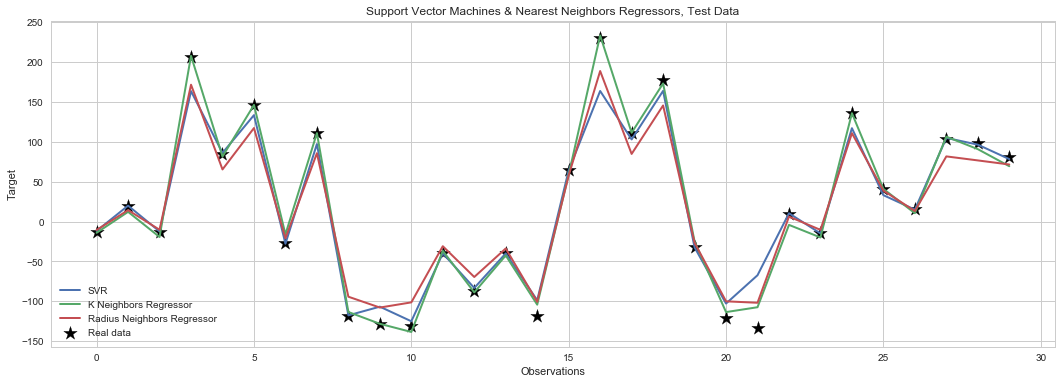

In [297]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_svr_test415[:n], lw=2, label='SVR')
plt.plot(x, y_knr_test416[:n], lw=2, label='K Neighbors Regressor')
plt.plot(x, y_rnr_test417[:n], lw=2, label='Radius Neighbors Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Support Vector Machines & Nearest Neighbors Regressors, Test Data')
plt.legend(loc=3);

In [298]:
df_results1, df_results1_2  = get_regressor_results()
df_results1_2.sort_values('r2_test', ascending=False)

,regressor_name,r2_train,r2_test,ev_train,ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test
10,PassiveAggressiveRegressor,1.0000,1.0000,1.0000,1.0000,0.0006,0.0006,0.0192,0.0197,0.0159,0.0174
12,SGDRegressor,1.0000,1.0000,1.0000,1.0000,0.0001,0.0001,0.0077,0.0076,0.0065,0.0065
14,KNeighborsRegressor,0.9949,0.9930,0.9949,0.9930,51.2332,69.7008,4.7369,5.6254,3.3241,4.0625
15,RadiusNeighborsRegressor,0.9662,0.9639,0.9662,0.9640,341.2650,357.2759,14.9431,15.1447,12.5505,12.8865
13,SVR,0.8971,0.9140,0.8971,0.9140,1037.9494,851.9558,12.3206,11.5612,1.0643,1.0181
11,ElasticNet,0.8877,0.8870,0.8877,0.8871,1132.3317,1118.5728,26.8735,26.5215,22.5523,22.4115
1,Ridge,0.7264,0.7657,0.7264,0.7664,22.1045,23.1593,3.1861,3.7101,2.3151,3.2462
2,RidgeCV,0.7292,0.7642,0.7292,0.7649,21.8746,23.3003,3.1897,3.7389,2.3831,3.1336
0,LinearRegression,0.7293,0.7635,0.7293,0.7641,21.8680,23.3746,3.1984,3.7491,2.3900,3.1127
4,LassoLarsCV,0.7290,0.7628,0.7290,0.7636,21.8904,23.4385,3.1861,3.7466,2.3413,3.0463


## 3.2. Classification

In [333]:
# Logistic Regression, SGD Classifier
clf1 = linear_model.LogisticRegression()
clf2 = linear_model.SGDClassifier()

In [334]:
y_lrc_train31, y_lrc_test31 = classifier_fit_score(clf1, 'LogisticRegression', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_sgdc_train132, y_sgdc_test32 = classifier_fit_score(clf2, 'SGDClassifier', 'digits',
                                                      X_train3, X_test3, y_train3, y_test3)[:2]

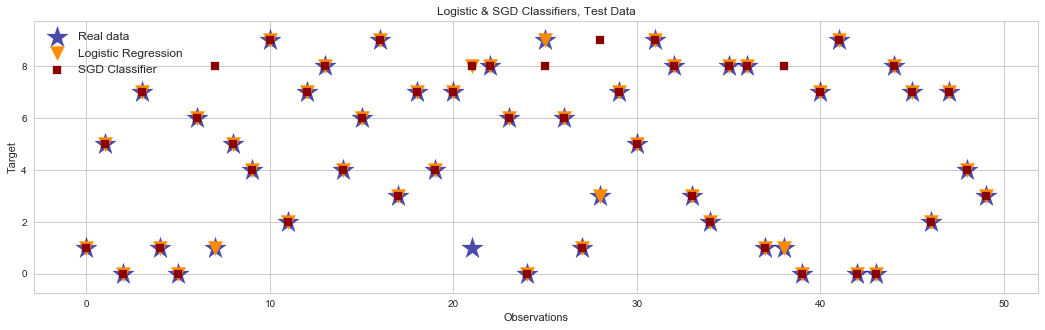

In [335]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='darkblue', alpha=0.7, label='Real data')

plt.scatter(x, y_lrc_test31[:n], marker='v', s=200, color='darkorange', label='Logistic Regression')
plt.scatter(x, y_sgdc_test32[:n], marker='s', s=50, color='darkred', label='SGD Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Logistic & SGD Classifiers, Test Data')
plt.legend(loc=2, fontsize=12);

In [336]:
# Linear and Quadratic Discriminant Analysis
clf3 = LinearDiscriminantAnalysis()
clf4 = QuadraticDiscriminantAnalysis()

In [337]:
y_ldac_train33, y_ldac_test33 = classifier_fit_score(clf3, 'LinearDiscriminantAnalysis', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_qdac_train34, y_qdac_test34 = classifier_fit_score(clf4, 'QuadraticDiscriminantAnalysis', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

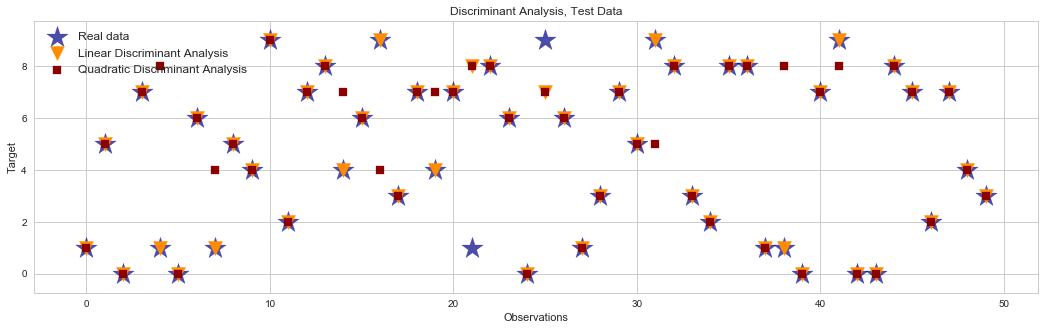

In [338]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='darkblue', alpha=0.7, label='Real data')

plt.scatter(x, y_ldac_test33[:n], marker='v', s=200, color='darkorange', label='Linear Discriminant Analysis')
plt.scatter(x, y_qdac_test34[:n], marker='s', s=50, color='darkred', label='Quadratic Discriminant Analysis')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Discriminant Analysis, Test Data')
plt.legend(loc=2, fontsize=12);

In [339]:
# Support Vector Machines
clf5 = svm.LinearSVC()
clf6 = svm.SVC(C=10.0, kernel='poly')
clf7 = svm.NuSVC(kernel='poly')

In [340]:
y_lsvc_train35, y_lsvc_test35 = classifier_fit_score(clf5, 'LinearSVC', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_svc_train36, y_svc_test36 = classifier_fit_score(clf6, 'SVC', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_nusvc_train37, y_nusvc_test37 = classifier_fit_score(clf7, 'NuSVC', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

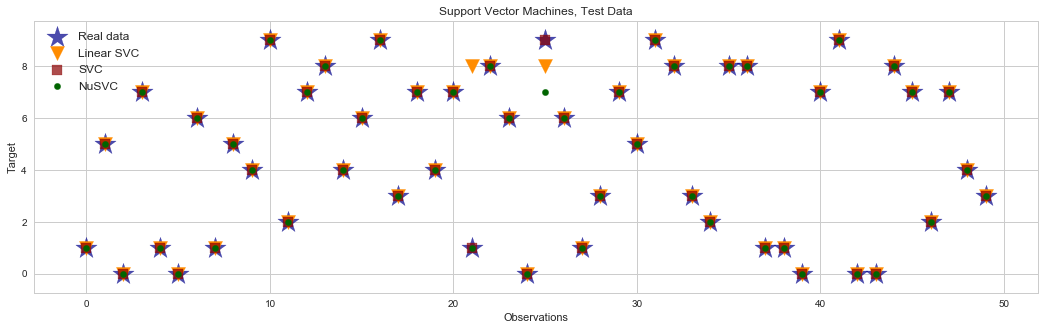

In [341]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='darkblue', alpha=0.7, label='Real data')

plt.scatter(x, y_lsvc_test35[:n], marker='v', s=200, color='darkorange', label='Linear SVC')
plt.scatter(x, y_svc_test36[:n], marker='s', s=100, color='darkred', alpha=0.7, label='SVC')
plt.scatter(x, y_nusvc_test37[:n], marker='o', s=40, color='darkgreen', label='NuSVC')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Support Vector Machines, Test Data')
plt.legend(loc=2, fontsize=12);

In [342]:
# Nearest Neighbors
clf8 = KNeighborsClassifier()
clf9 = RadiusNeighborsClassifier(radius=30)

In [343]:
y_knc_train38, y_knc_test38 = classifier_fit_score(clf8, 'KNeighborsClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_rnc_train39, y_rnc_test39 = classifier_fit_score(clf9, 'RadiusNeighborsClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

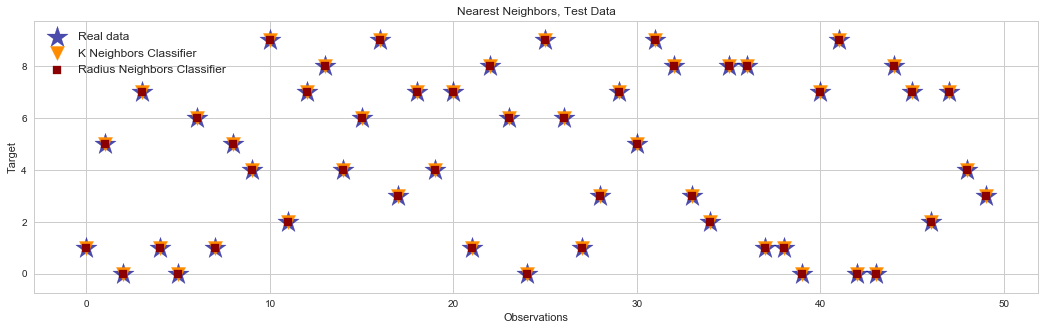

In [344]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='darkblue', alpha=0.7, label='Real data')

plt.scatter(x, y_knc_test38[:n], marker='v', s=200, color='darkorange', label='K Neighbors Classifier')
plt.scatter(x, y_rnc_test39[:n], marker='s', s=50, color='darkred', label='Radius Neighbors Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Nearest Neighbors, Test Data')
plt.legend(loc=2, fontsize=12);

In [345]:
df_results2, df_results2_2  = get_classifier_results()
df_results2_2.sort_values('acc_test', ascending=False)

,classifier_name,acc_train,acc_test,loss_train,loss_test
7,KNeighborsClassifier,0.9882,0.9944,0.0118,0.0056
8,RadiusNeighborsClassifier,0.9763,0.9944,0.0237,0.0056
5,SVC,1.0000,0.9861,0.0000,0.0139
0,LogisticRegression,0.9965,0.9694,0.0035,0.0306
6,NuSVC,0.9631,0.9639,0.0369,0.0361
2,LinearDiscriminantAnalysis,0.9659,0.9611,0.0341,0.0389
4,LinearSVC,0.9889,0.9500,0.0111,0.0500
1,SGDClassifier,0.9255,0.9111,0.0745,0.0889
3,QuadraticDiscriminantAnalysis,0.8824,0.8167,0.1176,0.1833


In [346]:
df_results2

,acc_test,acc_train,classifier,classifier_name,clf_dataset,loss_test,loss_train
0,0.9694,0.9965,"LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,digits,0.0306,0.0035
1,0.9111,0.9255,"SGDClassifier(alpha=0.0001, average=False, cla...",SGDClassifier,digits,0.0889,0.0745
2,0.9611,0.9659,"LinearDiscriminantAnalysis(n_components=None, ...",LinearDiscriminantAnalysis,digits,0.0389,0.0341
3,0.8167,0.8824,"QuadraticDiscriminantAnalysis(priors=None, reg...",QuadraticDiscriminantAnalysis,digits,0.1833,0.1176
4,0.9500,0.9889,"LinearSVC(C=1.0, class_weight=None, dual=True,...",LinearSVC,digits,0.0500,0.0111
5,0.9861,1.0000,"SVC(C=10.0, cache_size=200, class_weight=None,...",SVC,digits,0.0139,0.0000
6,0.9639,0.9631,"NuSVC(cache_size=200, class_weight=None, coef0...",NuSVC,digits,0.0361,0.0369
7,0.9944,0.9882,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNeighborsClassifier,digits,0.0056,0.0118
8,0.9944,0.9763,"RadiusNeighborsClassifier(algorithm='auto', le...",RadiusNeighborsClassifier,digits,0.0056,0.0237


---
# 4. Unsupervised learning

---
# 5. Neural network models

## 5.1 Supervised

In [363]:
# Multi-layer Perceptron
nn_clf1 = MLPClassifier(hidden_layer_sizes=(512,), max_iter=70, solver='sgd',
                        verbose=0, random_state=1, learning_rate_init=.01)
nn_clf1.fit(X_train3, y_train3);

In [364]:
nn_clf1.score(X_train3, y_train3)

1

In [365]:
nn_clf1.score(X_test3, y_test3)

0.9889

## 5.2 Unsupervised

In [366]:
# Restricted Boltzmann machines
X_train3_scaled = (X_train3 - np.min(X_train3, 0)) / (np.max(X_train3, 0) + 0.0001)
X_test3_scaled = (X_test3 - np.min(X_test3, 0)) / (np.max(X_test3, 0) + 0.0001)

logistic = linear_model.LogisticRegression()
logistic.C = 3000.0

brbm = BernoulliRBM(random_state=0, verbose=False)
brbm.learning_rate, brbm.n_iter, brbm.n_components = 0.05, 30, 64

nn_clf2 = Pipeline(steps=[('brbm', brbm), ('logistic', logistic)])

In [367]:
nn_clf2.fit(X_train3_scaled, y_train3)

Pipeline(steps=[('brbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=64, n_iter=30,
       random_state=0, verbose=False)), ('logistic', LogisticRegression(C=3000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [368]:
print("Logistic regression using BRBM features:\n%s\n" % \
      (classification_report(y_test3, nn_clf2.predict(X_test3_scaled))))

Logistic regression using BRBM features:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       1.00      1.00      1.00        35
          2       0.97      1.00      0.99        36
          3       0.93      0.95      0.94        41
          4       0.97      1.00      0.99        38
          5       0.93      0.90      0.92        30
          6       1.00      1.00      1.00        37
          7       1.00      0.92      0.96        37
          8       0.93      0.90      0.91        29
          9       0.89      0.97      0.93        34

avg / total       0.96      0.96      0.96       360


